Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation F1 Score: 0.8115042698136309
Number of iterations to converge: 500
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


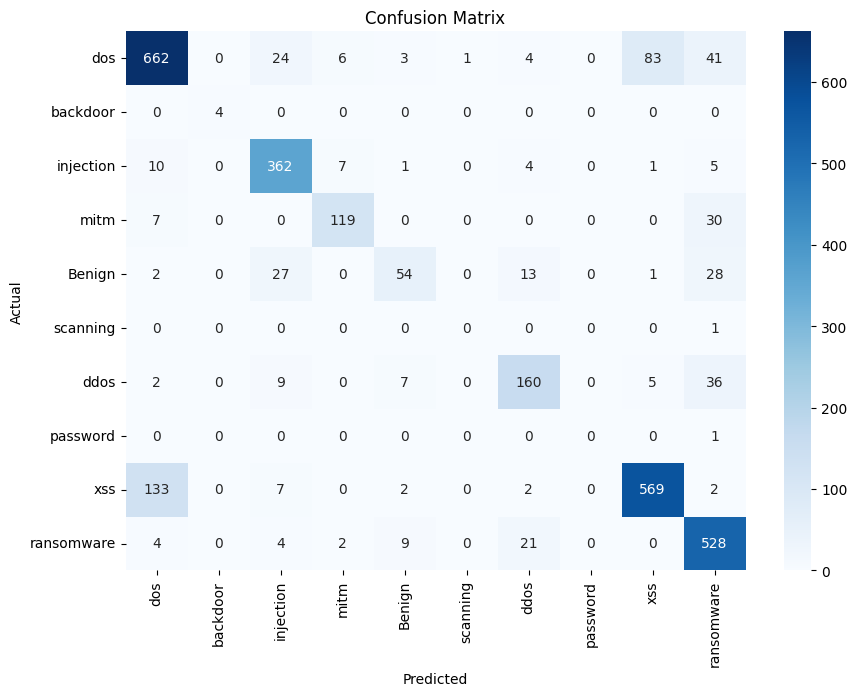

['best_logistic_regression_model.pkl']

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load CSV files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file paths for training and testing datasets
train_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_train.csv'
test_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_test.csv'

# Load the datasets into DataFrames
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Separate features and labels for training and testing datasets
X_train = train_data.iloc[:, :-2]  # All columns except the last two (labels)
y_train = train_data.iloc[:, -1]    # Last column (label names)

X_test = test_data.iloc[:, :-2]     # All columns except the last two (labels)
y_test = test_data.iloc[:, -1]       # Last column (label names)

# Define parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [ 0.1, 1, 10],  # Regularization strength
    'solver': ['saga','liblinear '],  # Solvers suitable for small and large datasets
    'max_iter': [500]
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42,)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='f1_weighted', cv=10, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters and score
print("Best Parameters:", best_params)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

# Fit the best model on the entire training set
best_model.fit(X_train, y_train)

# Get the number of iterations taken to converge
num_iterations = best_model.n_iter_[0]  # For binary classification, this will be a single value
print(f'Number of iterations to converge: {num_iterations}')

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics for test set
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the best model to a file
joblib.dump(best_model, 'best_logistic_regression_model.pkl')


In [7]:
# Import necessary libraries
import os
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path for the model and the folder name
model_folder = '/content/drive/My Drive/IDS models'
model_filename = 'NF-ToN-IoT-V2_logistic_regression_model.pkl'
model_path = os.path.join(model_folder, model_filename)

# Create the folder if it doesn't exist
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Save the model to the specified path
joblib.dump(best_model, model_path)

print(f'Model saved successfully at: {model_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully at: /content/drive/My Drive/IDS models/NF-ToN-IoT-V2_logistic_regression_model.pkl


In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train ,cv = 10, scoring = 'recall_weighted')
avg_scores = scores.mean()
avg_scores



0.8161532056619484

In [11]:
from sklearn.model_selection import cross_val_score
scores_test = cross_val_score(best_model, X_test, y_test ,cv = 10, scoring = 'recall_weighted')
avg_scores_test = scores_test.mean()
avg_scores_test

0.5371506090808417

In [10]:
print("Train score is:",format(avg_scores))
print("Test score is:",format(avg_scores_test))

Train score is: 0.8161532056619484
Test score is: 0.5371506090808417
